In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# import statsmodels.api as sm
# from scipy import stats
# from scipy.stats import chi2_contingency, fisher_exact
# from scipy.cluster.hierarchy import dendrogram, linkage
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA


# df = pd.read_csv('anonim-clean.csv')

# Testul Chi/Fisher pentru impactul rapoartelor radiologice 
asupra deciziei de a opera sau alegerea unui tratament conservator

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

# Load the data
df = pd.read_csv('anonim-clean.csv')

# Preprocessing
imaging_characteristics = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 'osteofite', 'deshidratări_discale', 'gadolinofilie', 'iodofilie', 'hdl', 'hemangioame', 'abces', 'fracturi', 'anterolistezis', 'cardiomegalie']

# Create binary columns for each imaging characteristic
for char in imaging_characteristics:
    df[char] = df['caracteristici imagistice'].str.contains(char, case=False, na=False).astype(int)

# Create a binary column for treatment type
df['treatment_type'] = np.where(df['tratament'].str.contains('chirurgical', case=False, na=False), 'Chirurgical', 'Conservativ')

# Function to perform statistical test and create bar plot
def analyze_characteristic(characteristic):
    contingency_table = pd.crosstab(df[characteristic], df['treatment_type'])
    
    # Perform chi-square or Fisher's exact test
    if (contingency_table.values < 5).any():
        _, p_value = fisher_exact(contingency_table)
        test_type = "Test Exact Fisher's"
    else:
        _, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = "Testul Chi-Pătrat"
    
    # Create bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=contingency_table.index, y=contingency_table.iloc[:, 0], color='blue', alpha=0.5, label='Conservativ')
    sns.barplot(x=contingency_table.index, y=contingency_table.iloc[:, 1], color='red', alpha=0.5, label='Chirurgical')
    plt.title(f'{characteristic.capitalize()} vs Tipul de tratament')
    plt.xlabel(characteristic.capitalize())
    plt.ylabel('Nr. crt.')
    plt.legend()
    # plt.savefig(f'{characteristic}_barplot.png')
    # plt.show()
    plt.close()
    
    return pd.DataFrame({
        'Characteristic': [characteristic],
        'Test Type': [test_type],
        'p-value': [p_value],
        'Significant': ['Yes' if p_value < 0.05 else 'No']
    })

# Analyze all characteristics and compile results
results = pd.concat([analyze_characteristic(char) for char in imaging_characteristics])

# Sort results by p-value
results = results.sort_values('p-value')

# Display the results table
print(results.to_string(index=False))

# Save results to CSV
# results.to_csv('statistical_test_results.csv', index=False)

# print("\nBar plots have been saved as PNG files.")
# print("Statistical test results have been saved to 'statistical_test_results.csv'.")

# Același test dar doar cu Ficher

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact
import numpy as np

# Load the data
df = pd.read_csv('anonim-clean.csv')

# Preprocessing
imaging_characteristics = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 
                         'osteofite', 'deshidratări_discale', 'gadolinofilie', 'iodofilie', 'hdl', 
                         'hemangioame', 'abces', 'fracturi', 'anterolistezis', 'cardiomegalie']

# Create binary columns for each imaging characteristic
for char in imaging_characteristics:
    df[char] = df['caracteristici imagistice'].str.contains(char, case=False, na=False).astype(int)

# Create a binary column for treatment type
df['treatment_type'] = np.where(df['tratament'].str.contains('chirurgical', case=False, na=False), 
                               'Chirurgical', 'Conservativ')

# Function to perform Fisher's exact test and create bar plot
def analyze_characteristic(characteristic):
    contingency_table = pd.crosstab(df[characteristic], df['treatment_type'])
    
    # Perform Fisher's exact test
    _, p_value = fisher_exact(contingency_table)
    
    # # Create bar plot
    # plt.figure(figsize=(8, 6))
    # sns.barplot(x=contingency_table.index, y=contingency_table.iloc[:, 0], 
    #             color='blue', alpha=0.5, label='Conservativ')
    # sns.barplot(x=contingency_table.index, y=contingency_table.iloc[:, 1], 
    #             color='red', alpha=0.5, label='Chirurgical')
    # plt.title(f'{characteristic.capitalize()} vs Tipul de tratament')
    # plt.xlabel(characteristic.capitalize())
    # plt.ylabel('Nr. crt.')
    # plt.legend()
    # # plt.savefig(f'{characteristic}_barplot.png')
    # # plt.show()
    # plt.close()
    
    return pd.DataFrame({
        'Characteristic': [characteristic],
        'Test Type': ["Test Exact Fisher"],
        'p-value': [p_value],
        'Significant': ['Da' if p_value < 0.05 else 'Nu']
    })

# Analyze all characteristics and compile results
results = pd.concat([analyze_characteristic(char) for char in imaging_characteristics])

# Sort results by p-value
results = results.sort_values('p-value')

# Display the results table
print(results.to_string(index=False))

# Save results to CSV
# results.to_csv('statistical_test_results.csv', index=False)

      Characteristic         Test Type  p-value Significant
            fracturi Test Exact Fisher 0.246011          Nu
            colecții Test Exact Fisher 0.259169          Nu
       gadolinofilie Test Exact Fisher 0.641273          Nu
                 hdl Test Exact Fisher 0.682985          Nu
            eroziuni Test Exact Fisher 1.000000          Nu
              tasări Test Exact Fisher 1.000000          Nu
                edem Test Exact Fisher 1.000000          Nu
             stenoză Test Exact Fisher 1.000000          Nu
 amprentare_medulară Test Exact Fisher 1.000000          Nu
           osteofite Test Exact Fisher 1.000000          Nu
deshidratări_discale Test Exact Fisher 1.000000          Nu
           iodofilie Test Exact Fisher 1.000000          Nu
         hemangioame Test Exact Fisher 1.000000          Nu
               abces Test Exact Fisher 1.000000          Nu
      anterolistezis Test Exact Fisher 1.000000          Nu
       cardiomegalie Test Exact Fisher 1

# Distribution Analysis

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact

def analyze_characteristic_detailed(df, characteristic):
    # Create contingency table
    contingency_table = pd.crosstab(df[characteristic], df['treatment_type'])
    
    # Perform Fisher's exact test
    _, p_value = fisher_exact(contingency_table)
    
    # Calculate total cases for each category
    total_cases = len(df)
    cases_with_characteristic = df[characteristic].sum()
    
    return pd.DataFrame({
        'Characteristic': [characteristic],
        'Total Cases': [total_cases],
        'Cases with characteristic': [cases_with_characteristic],
        'Percentage': [f"{(cases_with_characteristic/total_cases*100):.1f}%"],
        'Conservative (with char)': [contingency_table.loc[1, 'Conservativ'] if 1 in contingency_table.index else 0],
        'Surgical (with char)': [contingency_table.loc[1, 'Chirurgical'] if 1 in contingency_table.index else 0],
        'p-value': [p_value]
    })

# Analyze all characteristics with detailed distribution
results_detailed = pd.concat([analyze_characteristic_detailed(df, char) 
                            for char in imaging_characteristics])

# Sort by p-value
results_detailed = results_detailed.sort_values('p-value')

# Display the results
print(results_detailed.to_string(index=False))

      Characteristic  Total Cases  Cases with characteristic Percentage  Conservative (with char)  Surgical (with char)  p-value
            fracturi           48                          3       6.2%                         3                     0 0.246011
            colecții           48                         25      52.1%                        12                    13 0.259169
       gadolinofilie           48                          5      10.4%                         2                     3 0.641273
                 hdl           48                          7      14.6%                         3                     4 0.682985
            eroziuni           48                         36      75.0%                        20                    16 1.000000
              tasări           48                         11      22.9%                         6                     5 1.000000
                edem           48                         37      77.1%                        21

# Date comasate


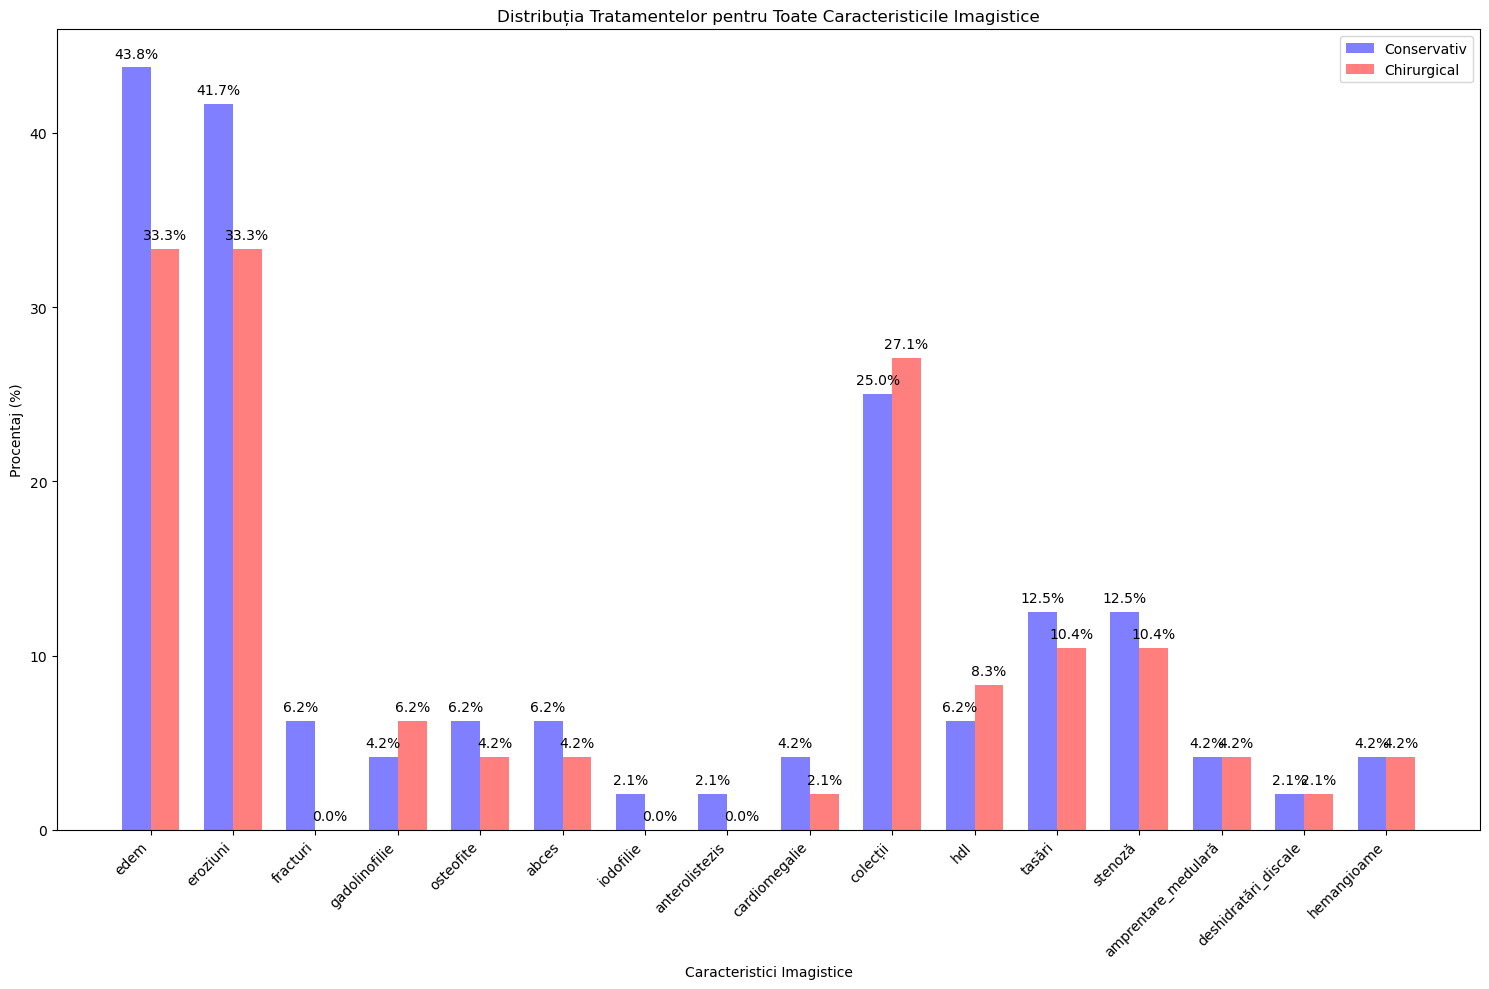

      Characteristic  Conservativ %  Chirurgical %  Difference  p-value
                edem      43.750000      33.333333       10.42 1.000000
            eroziuni      41.666667      33.333333        8.33 1.000000
            fracturi       6.250000       0.000000        6.25 0.246011
       gadolinofilie       4.166667       6.250000        2.08 0.641273
           osteofite       6.250000       4.166667        2.08 1.000000
               abces       6.250000       4.166667        2.08 1.000000
           iodofilie       2.083333       0.000000        2.08 1.000000
      anterolistezis       2.083333       0.000000        2.08 1.000000
       cardiomegalie       4.166667       2.083333        2.08 1.000000
            colecții      25.000000      27.083333        2.08 0.362806
                 hdl       6.250000       8.333333        2.08 0.682985
              tasări      12.500000      10.416667        2.08 1.000000
             stenoză      12.500000      10.416667        2.08 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Presupunem că avem deja rezultatele în DataFrame-ul 'results'
# Dacă nu, puteți crea DataFrame-ul din datele furnizate

# Sortarea rezultatelor după diferența absolută între procentaje
results['Difference'] = abs(results['Conservativ %'] - results['Chirurgical %'])
results = results.sort_values('Difference', ascending=False)

# Selectarea tuturor caracteristicilor
all_chars = results['Characteristic'].tolist()

# Crearea graficului combinat pentru toate caracteristicile
plt.figure(figsize=(15, 10))
x = np.arange(len(all_chars))
width = 0.35

conservativ = results['Conservativ %']
chirurgical = results['Chirurgical %']

plt.bar(x - width/2, conservativ, width, label='Conservativ', color='blue', alpha=0.5)
plt.bar(x + width/2, chirurgical, width, label='Chirurgical', color='red', alpha=0.5)

plt.xlabel('Caracteristici Imagistice')
plt.ylabel('Procentaj (%)')
plt.title('Distribuția Tratamentelor pentru Toate Caracteristicile Imagistice')
plt.xticks(x, all_chars, rotation=45, ha='right')
plt.legend()

# Adăugarea valorilor procentuale pe bare
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = f"{y_value:.1f}%"
        
        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                    textcoords="offset points", ha='center', va='bottom')

add_value_labels(plt.gca())

plt.tight_layout()
plt.show()

# Afișarea tabelului cu rezultate, inclusiv diferența
results['Difference'] = results['Difference'].round(2)
print(results[['Characteristic', 'Conservativ %', 'Chirurgical %', 'Difference', 'p-value']].to_string(index=False))

print("\nGraficul combinat a fost afișat.")
print("Notă: Caracteristicile sunt sortate după diferența absolută între procentajele de tratament conservativ și chirurgical.")

# Regresie logistică și man whiteny u test 
ca să vedem dacă numărul de caracteristici influențează tratamentul 

Raport de clasificare:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       0.00      0.00      0.00         7

    accuracy                           0.53        15
   macro avg       0.27      0.50      0.35        15
weighted avg       0.28      0.53      0.37        15


Matrice de confuzie:
[[8 0]
 [7 0]]

Coeficient: 0.0478
Intercept: -0.4637
Odds Ratio: 1.0490

Rezultatele testului U Mann-Whitney:
Statistica de test: 263.0
Valoarea p: 0.6656


/opt/anaconda3/envs/dis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


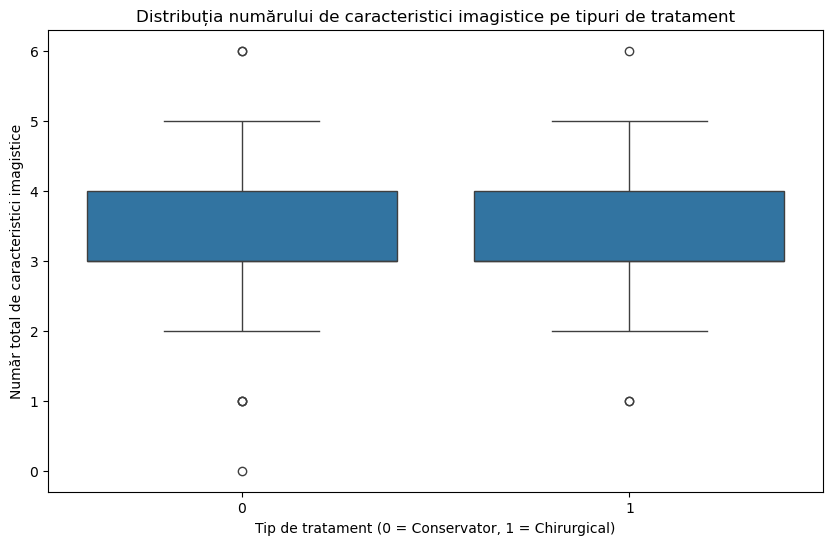


Statistici descriptive:
                count      mean       std  min  25%  50%  75%  max
treatment_type                                                    
0                27.0  3.259259  1.483048  0.0  3.0  3.0  4.0  6.0
1                21.0  3.428571  1.207122  1.0  3.0  3.0  4.0  6.0


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Încărcarea datelor
df = pd.read_csv('anonim-clean.csv')

# Definirea caracteristicilor imagistice
imaging_characteristics = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 'osteofite', 'deshidratări_discale', 'gadolinofilie', 'iodofilie', 'hdl', 'hemangioame', 'abces', 'fracturi', 'anterolistezis', 'cardiomegalie']

# Crearea coloanelor binare pentru fiecare caracteristică imagistică
for char in imaging_characteristics:
    df[char] = df['caracteristici imagistice'].str.contains(char, case=False, na=False).astype(int)

# Calcularea numărului total de caracteristici imagistice pentru fiecare pacient
df['total_characteristics'] = df[imaging_characteristics].sum(axis=1)

# Crearea variabilei dependente (0 = conservator, 1 = chirurgical)
df['treatment_type'] = np.where(df['tratament'].str.contains('chirurgical', case=False, na=False), 1, 0)

# 1. Regresie logistică binară
X = df[['total_characteristics']]
y = df['treatment_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluarea modelului
y_pred = model.predict(X_test)
print("Raport de clasificare:")
print(classification_report(y_test, y_pred))
print("\nMatrice de confuzie:")
print(confusion_matrix(y_test, y_pred))

# Coeficienții și interceptul modelului
print(f"\nCoeficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

# Calcularea și afișarea odds ratio
odds_ratio = np.exp(model.coef_[0][0])
print(f"Odds Ratio: {odds_ratio:.4f}")

# 2. Testul U Mann-Whitney
conservator = df[df['treatment_type'] == 0]['total_characteristics']
chirurgical = df[df['treatment_type'] == 1]['total_characteristics']

statistic, p_value = stats.mannwhitneyu(conservator, chirurgical, alternative='two-sided')

print("\nRezultatele testului U Mann-Whitney:")
print(f"Statistica de test: {statistic}")
print(f"Valoarea p: {p_value:.4f}")

# Vizualizare
plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment_type', y='total_characteristics', data=df)
plt.title('Distribuția numărului de caracteristici imagistice pe tipuri de tratament')
plt.xlabel('Tip de tratament (0 = Conservator, 1 = Chirurgical)')
plt.ylabel('Număr total de caracteristici imagistice')
plt.show()

# Afișarea statisticilor descriptive
print("\nStatistici descriptive:")
print(df.groupby('treatment_type')['total_characteristics'].describe())